In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
hr=pd.read_csv("happiness_ranking_report.csv")
hr

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df=hr.copy()

## EDA

In [5]:
df.shape

(158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
list1=['Country','Region']

for i in list1:
    df[i]=le.fit_transform(df[i])
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
df['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158], dtype=int64)

### Univariate analysis

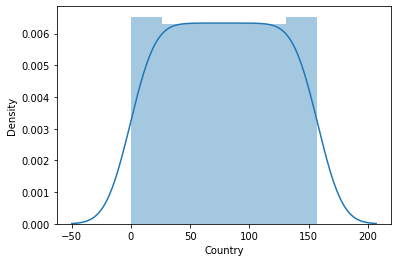

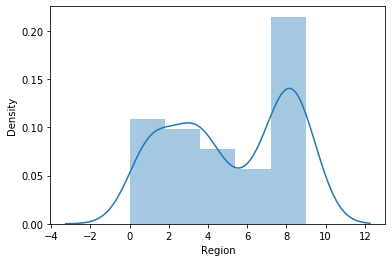

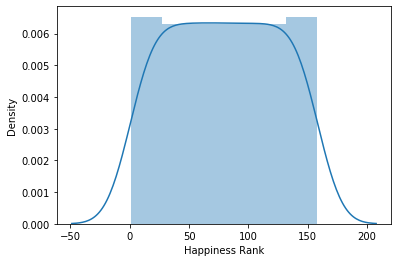

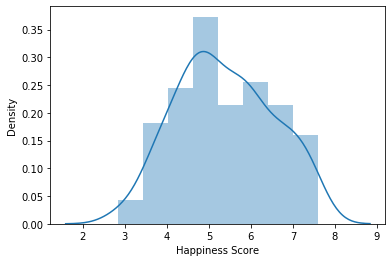

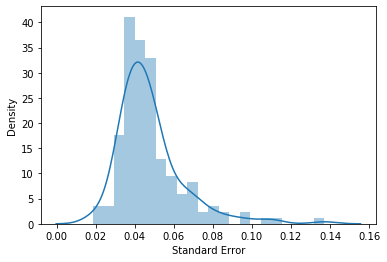

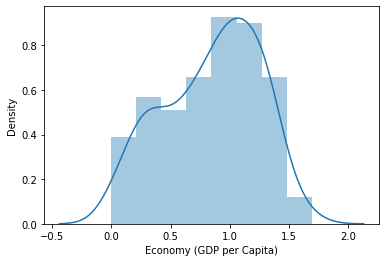

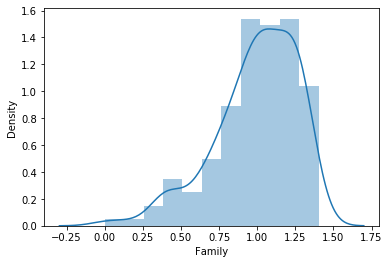

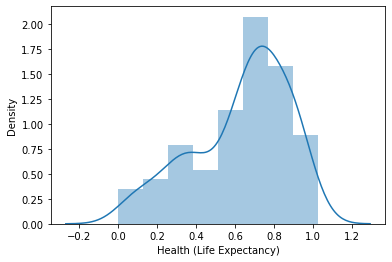

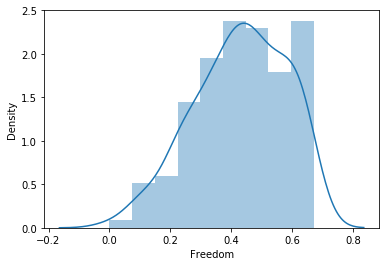

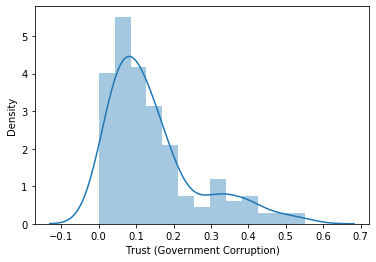

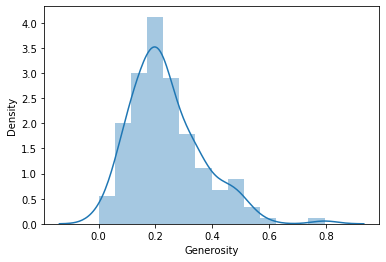

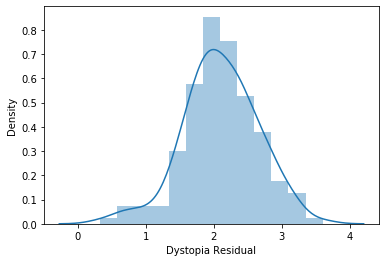

In [11]:
for i in df.columns:
    plt.figure()
    sn.distplot(df[i])

In [12]:
df=pd.DataFrame(df)

### Bivariate analysis

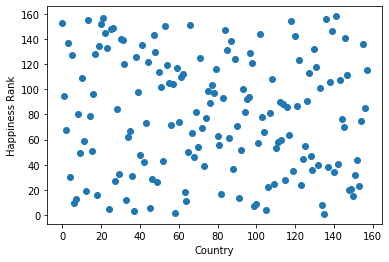

In [13]:
plt.scatter(df['Country'],df['Happiness Rank'])
plt.xlabel('Country')
plt.ylabel('Happiness Rank')
plt.show()

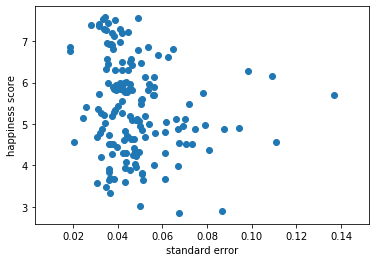

In [14]:
plt.scatter(df['Standard Error'],df['Happiness Score'])
plt.xlabel("standard error")
plt.ylabel("happiness score")
plt.show()

### Multivariate analysis

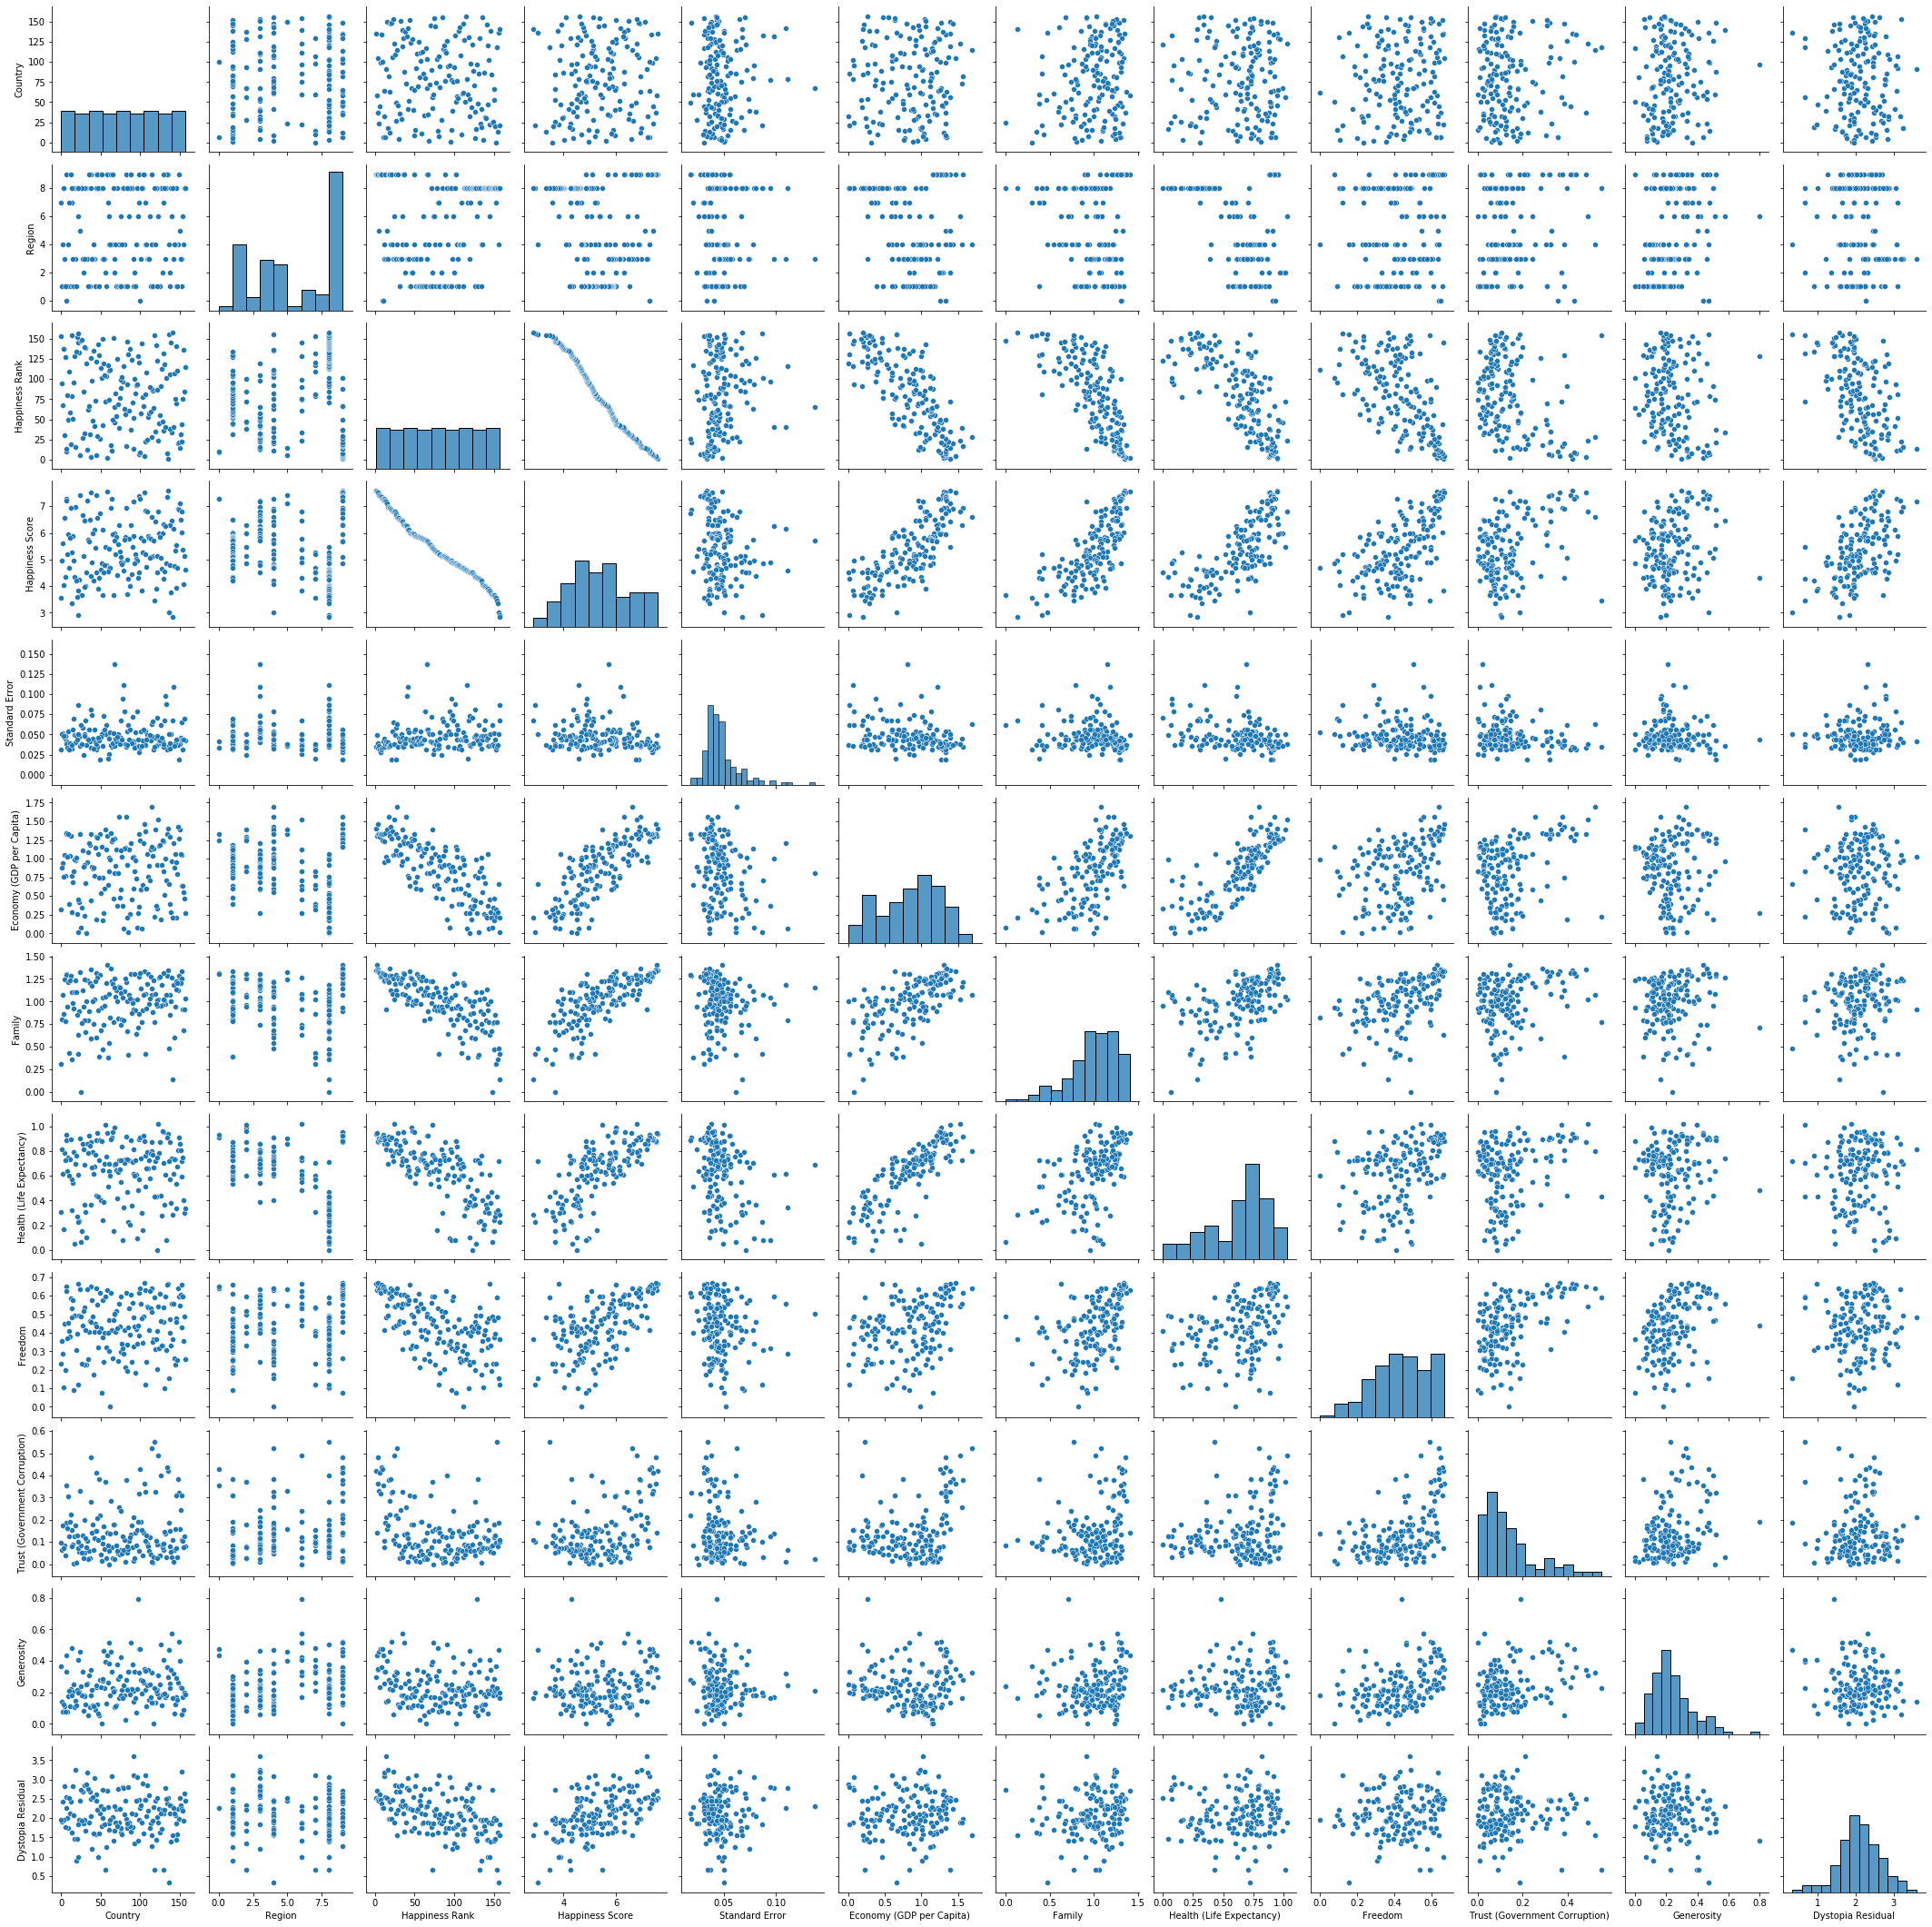

In [15]:
sn.pairplot(df)

### Checking the correlation with heatmap

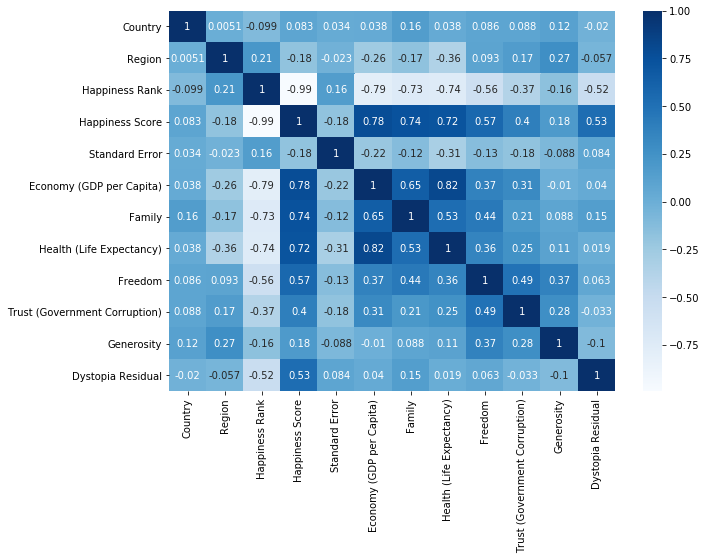

In [16]:
plt.figure(figsize=(10,7))
sn.heatmap(df.corr(),annot=True,cmap='Blues')

### Scaling 

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [18]:
mms=MinMaxScaler()
ss=StandardScaler()

In [19]:
df['Country']=ss.fit_transform(df['Country'].values.reshape(-1,1))

In [20]:
df['Happiness Rank']=ss.fit_transform(df['Happiness Rank'].values.reshape(-1,1))

In [21]:
df['Region']=mms.fit_transform(df['Region'].values.reshape(-1,1))

In [22]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.000000,-1.721000,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,-0.449465,1.000000,-1.699075,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,-0.909893,1.000000,-1.677149,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.581016,1.000000,-1.655224,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,-1.194920,0.555556,-1.633299,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.888889,1.633576,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,-1.436096,0.888889,1.655501,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,1.260695,0.444444,1.677427,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,-1.260695,0.888889,1.699352,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Checking the outliers using BoxPlot

Country                             AxesSubplot(0.125,0.657941;0.168478x0.222059)
Region                           AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Happiness Rank                   AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Happiness Score                  AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Standard Error                      AxesSubplot(0.125,0.391471;0.168478x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Family                           AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Health (Life Expectancy)         AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Freedom                                AxesSubplot(0.125,0.125;0.168478x0.222059)
Trust (Government Corruption)       AxesSubplot(0.327174,0.125;0.168478x0.222059)
Generosity                          AxesSubplot(0.529348,0.125;0.168478x0.222059)
Dystopia Residual                   AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

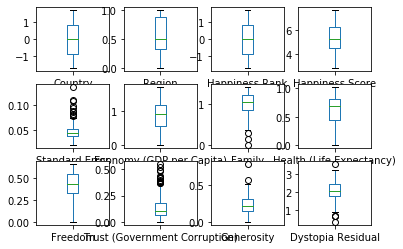

In [23]:
df.plot(kind='box',subplots=True,layout=(3,4))

In [24]:
from scipy.stats import zscore        # apply zscore for removing the outliers

In [25]:
z=np.abs(zscore(df))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [26]:
df_new=df[(z<3).all(axis=1)]

In [27]:
df_new.shape

(149, 12)

In [28]:
df.shape

(158, 12)

In [29]:
(9/158)*100

5.69620253164557

### Checking for the skewness

In [30]:
df_new.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [31]:
from sklearn.preprocessing import PowerTransformer

In [32]:
list2=['Standard Error','Family','Health (Life Expectancy)','Trust (Government Corruption)','Generosity']
pt=PowerTransformer(method='yeo-johnson',standardize=True)

for i in list2:
    df_new[i]=pt.fit_transform(df_new[i].values.reshape(-1,1))

In [33]:
df_new.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.390657
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.400867
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual               -0.021144
dtype: float64

In [34]:
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.000000,-1.721000,7.587,-0.950337,1.39651,1.658880,1.469636,0.66557,1.817625,0.659579,2.51738
1,-0.449465,1.000000,-1.699075,7.561,0.378562,1.30232,2.009125,1.511292,0.62877,0.329676,1.562604,2.70201
2,-0.909893,1.000000,-1.677149,7.527,-1.041401,1.32548,1.730785,1.053469,0.64938,1.953400,0.977226,2.49204
3,0.581016,1.000000,-1.655224,7.522,-0.471124,1.45900,1.540248,1.117188,0.66973,1.664359,1.015018,2.46531
4,-1.194920,0.555556,-1.633299,7.427,-0.799032,1.32629,1.487718,1.242549,0.63297,1.541247,1.682150,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,-0.274064,0.888889,1.567800,3.655,0.563000,0.46534,-1.047195,-1.707662,0.46866,0.681035,-0.131736,1.41723
151,-1.282620,0.888889,1.589725,3.587,-0.068119,0.25812,-0.778550,-1.435893,0.39493,0.188577,0.012019,1.46494
152,-1.721123,0.777778,1.611651,3.575,-1.320810,0.31982,-2.087389,-1.352388,0.23414,-0.192843,1.134258,1.95210
154,-1.436096,0.888889,1.655501,3.340,-0.692726,0.28665,-2.010443,-1.309709,0.48450,-0.434498,-0.312080,1.63328


### Spliting the data for testing and training

In [35]:
y=df_new['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [36]:
x=df_new.drop(columns=['Happiness Score'])
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.000000,-1.721000,-0.950337,1.39651,1.658880,1.469636,0.66557,1.817625,0.659579,2.51738
1,-0.449465,1.000000,-1.699075,0.378562,1.30232,2.009125,1.511292,0.62877,0.329676,1.562604,2.70201
2,-0.909893,1.000000,-1.677149,-1.041401,1.32548,1.730785,1.053469,0.64938,1.953400,0.977226,2.49204
3,0.581016,1.000000,-1.655224,-0.471124,1.45900,1.540248,1.117188,0.66973,1.664359,1.015018,2.46531
4,-1.194920,0.555556,-1.633299,-0.799032,1.32629,1.487718,1.242549,0.63297,1.541247,1.682150,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,-0.274064,0.888889,1.567800,0.563000,0.46534,-1.047195,-1.707662,0.46866,0.681035,-0.131736,1.41723
151,-1.282620,0.888889,1.589725,-0.068119,0.25812,-0.778550,-1.435893,0.39493,0.188577,0.012019,1.46494
152,-1.721123,0.777778,1.611651,-1.320810,0.31982,-2.087389,-1.352388,0.23414,-0.192843,1.134258,1.95210
154,-1.436096,0.888889,1.655501,-0.692726,0.28665,-2.010443,-1.309709,0.48450,-0.434498,-0.312080,1.63328


### Finding the best random state

In [37]:
maxacc=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=i)
    dtc=DecisionTreeRegressor()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.997871039358073  at random state 102


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=102)

In [54]:
x_train.shape

(113, 11)

In [55]:
x_test.shape

(36, 11)

In [56]:
y_train.shape

(113,)

In [57]:
y_test.shape

(36,)

### Model trainings

In [58]:
lg=LinearRegression()

In [68]:
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(r2_score(y_test,predlg))
print(mean_squared_error(y_test,predlg))
score=cross_val_score(lg,x,y,cv=10)
print(score.mean())


0.9965355332415762
0.004445026835844651
0.6075143233383085


### Hyper Parameter Tunning

In [60]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameter={'kernel':['linear','poly','rbf','sigmoid']}
gcv=GridSearchCV(SVR(),parameter,cv=5)
gcv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [66]:
gcv.best_params_

{'kernel': 'linear'}

In [67]:
sv=SVR(kernel='linear')
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
print(r2_score(y_test,predsv))
print(mean_squared_error(y_test,predsv))
score=cross_val_score(sv,x,y,cv=5)
print(score.mean())

0.9964105669232595
0.004605362805916734
0.8080879051158799


### Saving the model

In [69]:
import joblib

In [70]:
joblib.dump(sv,'happinessrank_svr.obj')

['happinessrank_svr.obj']